In [49]:
"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."



'I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.'

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [51]:
df = pd.read_csv("income_dataset.csv")

In [52]:
df.shape

(32561, 15)

In [53]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [54]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [55]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [56]:
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [58]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.nunique()

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country    42
income             2
dtype: int64

In [59]:
# Lets explore the categorical/string columns in more detail
# Note that there are some '?' values which must be missing values

for col in df_categorical:
    print(col, ": ", df[col].unique())

workclass :  ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education :  ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status :  ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation :  ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship :  ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race :  ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex :  ['Female' 'Male']
native.country :  ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippi

In [60]:
# Replacing ? with NaN

df.replace("?", np.nan, inplace = True)
df.isnull().any(axis=1).sum()

2399

In [61]:
# Handling missing values. 
# Since only few rows (about 7%) are containing missing values we can remove them
df.dropna(inplace=True)

In [62]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [63]:
## EDA plots

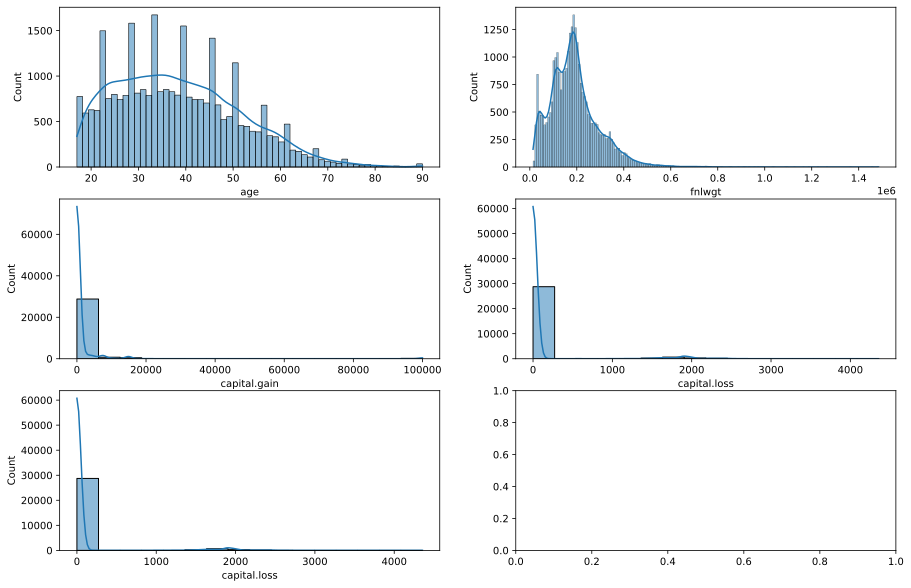

In [64]:
# First univariate analysis - histplots for continuous and countplots for categorical 

fig, ax = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(x="age", data=df, kde=True, ax=ax[0, 0])
sns.histplot(x="fnlwgt", data=df, kde=True, ax=ax[0, 1])
sns.histplot(x="capital.gain", data=df, kde=True, ax=ax[1, 0])
sns.histplot(x="capital.loss", data=df, kde=True, ax=ax[1, 1])
sns.histplot(x="capital.loss", data=df, kde=True, ax=ax[2, 0])

plt.show()

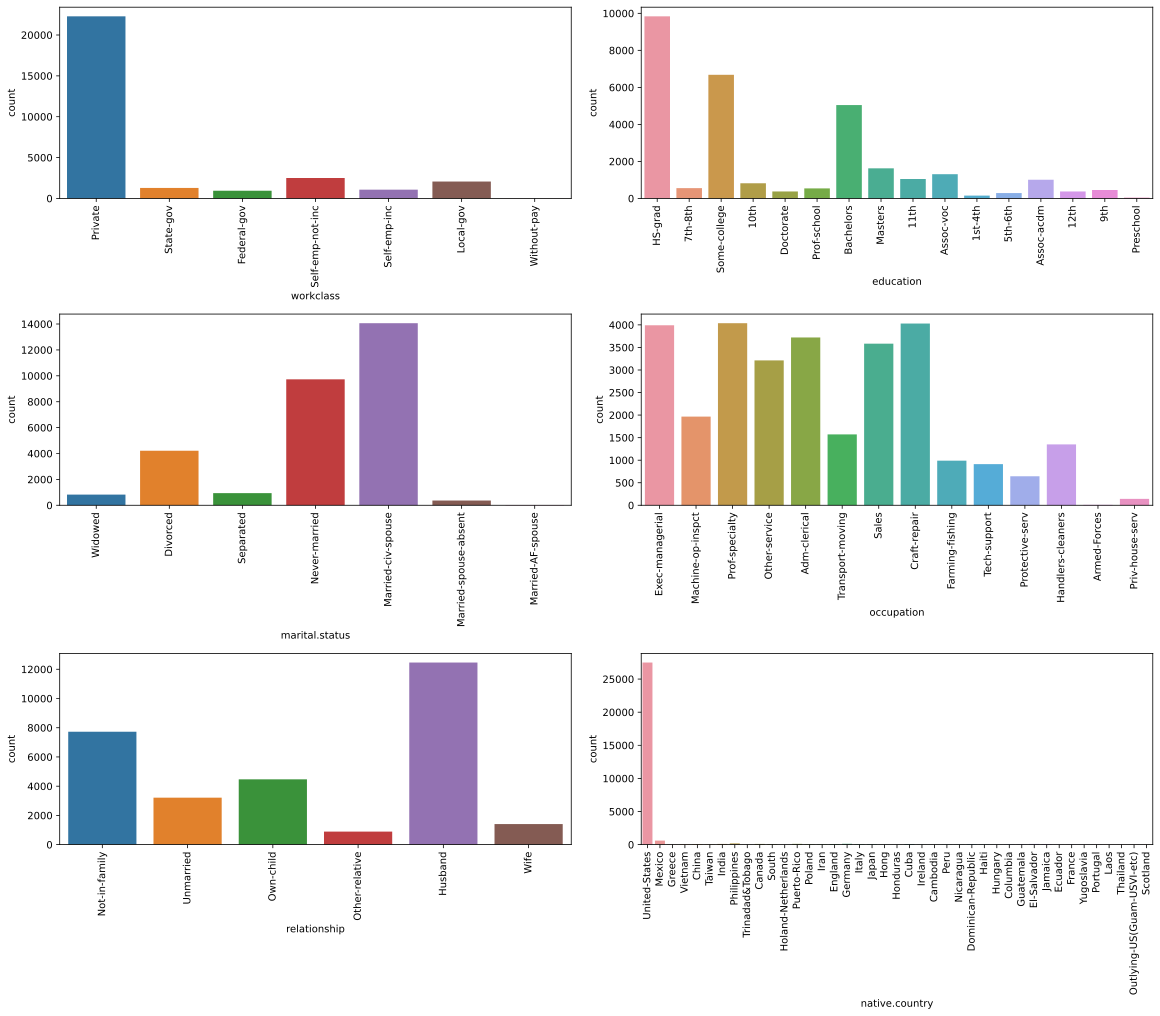

In [65]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14), constrained_layout=True)

sns.countplot(x='workclass', data=df, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='education', data=df, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='marital.status', data=df, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='occupation', data=df, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='relationship', data=df, ax=ax[2,0])
ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), rotation=90, fontsize=10)

sns.countplot(x='native.country', data=df, ax=ax[2,1])
ax[2,1].set_xticklabels(ax[2,1].get_xticklabels(), rotation=90, fontsize=10)

plt.show()

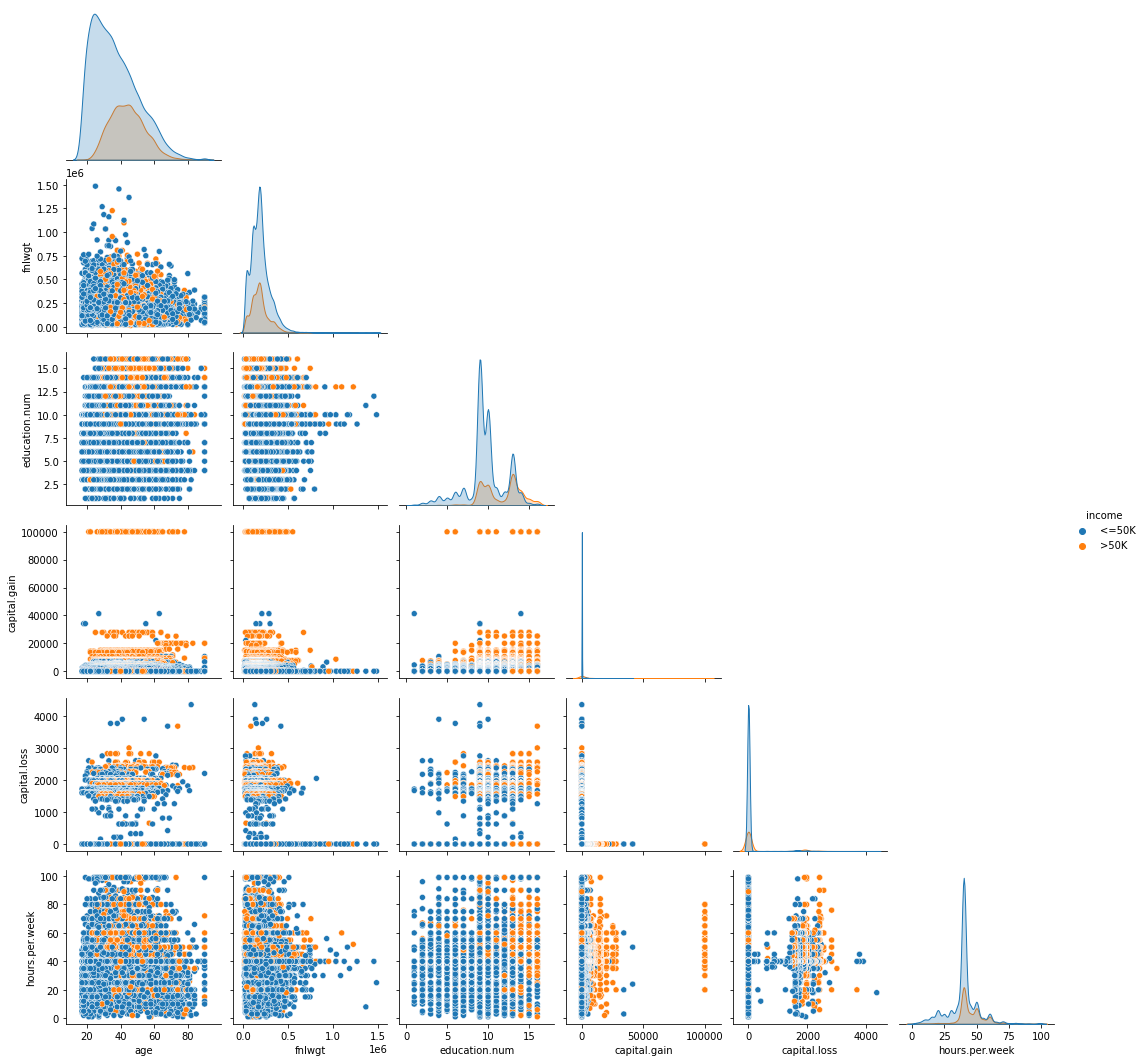

In [ ]:
# Bi-variate analysis

sns.pairplot(df, hue="income", corner=True)
plt.show()

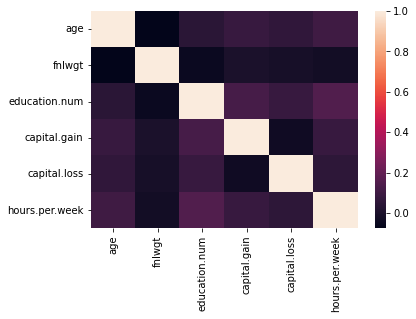

In [ ]:
sns.heatmap(df.corr())
plt.show()

# negligible correlation between variables

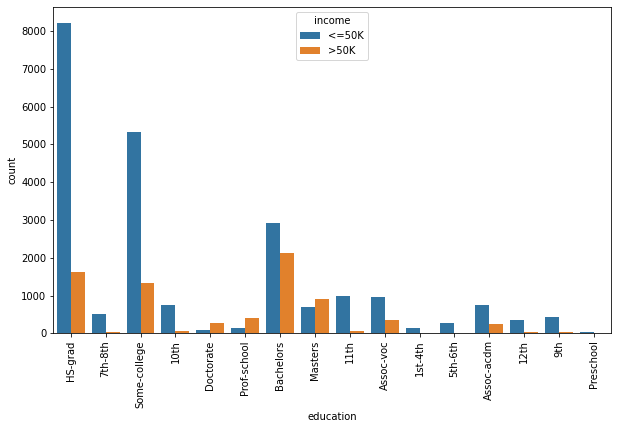

In [ ]:
# Impact of education on income

plt.figure(figsize=(10,6))
ax = sns.countplot(x='education', hue='income', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

<Figure size 720x432 with 0 Axes>

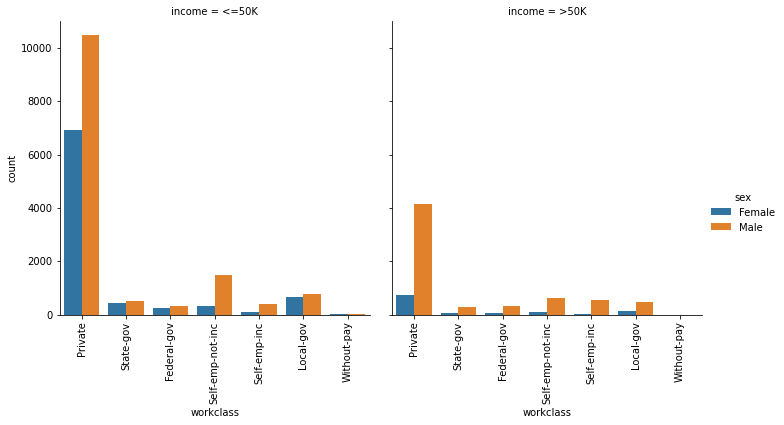

In [ ]:
# Multivariate

# Impact of workclass and sex on income using countplots

plt.figure(figsize=(10,6))
ax = sns.catplot(x='workclass', hue='income', col='sex', data=df, kind='count')
ax.set_xticklabels(rotation=90, fontsize=10)
plt.show()

In [ ]:
# Building NN model

In [18]:
# checking if we need both education and education_num columns

for edu in df['education'].unique():
    print(edu,":", df[df['education'] == edu]["education.num"].nunique())
    
# Note that 'education.num' is unique for each value of 'education'. 
# It also appears to be ordinal which makes sense. 
# Thus, we can remove 'education' column

df = df.drop(columns = ['education'])

HS-grad : 1
7th-8th : 1
Some-college : 1
10th : 1
Doctorate : 1
Prof-school : 1
Bachelors : 1
Masters : 1
11th : 1
Assoc-voc : 1
1st-4th : 1
5th-6th : 1
Assoc-acdm : 1
12th : 1
9th : 1
Preschool : 1


In [19]:
# One-hot encoding the categorical variables to use in NN model

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 82 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   fnlwgt                                     30162 non-null  int64
 2   education.num                              30162 non-null  int64
 3   capital.gain                               30162 non-null  int64
 4   capital.loss                               30162 non-null  int64
 5   hours.per.week                             30162 non-null  int64
 6   workclass_Local-gov                        30162 non-null  uint8
 7   workclass_Private                          30162 non-null  uint8
 8   workclass_Self-emp-inc                     30162 non-null  uint8
 9   workclass_Self-emp-not-inc                 30162 non-null  uint8
 10  workclass_State-gov                        301

In [21]:
# min-max scaling of the continuous features

continuous_columns = ["age", "fnlwgt", "capital.loss", "capital.gain", "education.num", "hours.per.week"]

for col in continuous_columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [22]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df["income_>50K"]
# Split Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  

In [18]:
#Input features to the first hidden layer of 128 neurons, followed by two additional hidden layers of 256 neurons.
#There’s a 1-neuron output layer at the end. Hidden layers use ReLU as the activation function, and the output layer uses Sigmoid

import tensorflow as tf

tf.random.set_seed(42)


model = tf.keras.Sequential([
                             
    tf.keras.layers.Dense(128, activation='relu',input_shape = (81,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
632/632 [==============================] - 7s 4ms/step - loss: 0.3852 - accuracy: 0.8150 - precision: 0.6665 - recall: 0.5140
Epoch 2/200
632/632 [==============================] - 3s 4ms/step - loss: 0.3485 - accuracy: 0.8359 - precision: 0.7006 - recall: 0.5949
Epoch 3/200
632/632 [==============================] - 3s 4ms/step - loss: 0.3377 - accuracy: 0.8435 - precision: 0.7205 - recall: 0.6066
Epoch 4/200
632/632 [==============================] - 3s 4ms/step - loss: 0.3306 - accuracy: 0.8440 - precision: 0.7201 - recall: 0.6110
Epoch 5/200
632/632 [==============================] - 3s 4ms/step - loss: 0.3249 - accuracy: 0.8488 - precision: 0.7296 - recall: 0.6241
Epoch 6/200
632/632 [==============================] - 3s 4ms/step - loss: 0.3206 - accuracy: 0.8507 - precision: 0.7337 - recall: 0.6281
Epoch 7/200
632/632 [==============================] - 3s 4ms/step - loss: 0.3171 - accuracy: 0.8508 - precision: 0.7351 - recall: 0.6261
Epoch 8/200
632/632 [=============

In [20]:
# Part 2 
# Changing the Dropout as the first hyperparameter. Taking Dropout rate as 0.1 / 0.2 and 0.4 
import tensorflow as tf

tf.random.set_seed(42)


initializer = tf.keras.initializers.RandomNormal(mean = 0.00, stddev = 0.002)

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128, activation='relu', input_shape = (81,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dropout(rate = 0.1),
    tf.keras.layers.Dense(1, kernel_initializer=initializer)
])

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adamax(lr = 0.001),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
        tf.keras.metrics.Precision(name = 'precision'),
        tf.keras.metrics.Recall(name = 'recall')
    ]
)

history = model.fit(X_train, y_train, epochs = 35)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


Epoch 1/35
632/632 [==============================] - 4s 4ms/step - loss: 1.2108 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/35
632/632 [==============================] - 3s 4ms/step - loss: 1.0922 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/35
632/632 [==============================] - 3s 4ms/step - loss: 1.0019 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/35
632/632 [==============================] - 3s 4ms/step - loss: 0.9242 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/35
632/632 [==============================] - 3s 4ms/step - loss: 0.8544 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/35
632/632 [==============================] - 3s 5ms/step - loss: 0.7873 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/35
632/632 [==============================] - 3s 4ms/step - loss: 0.7247 - accuracy: 0.7510 - precision: 0.0000e+00 - reca

In [21]:
tf.random.set_seed(42)

#Doing Optimizer tuning so taking AdaMax, AdaDelta, and Ftrl. 

initializer = tf.keras.initializers.RandomNormal(mean = 0.0, stddev = 0.002)

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128, activation='relu', input_shape = (81,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dropout(rate = 0.1),
])

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    #optimizer = tf.keras.optimizers.Ftrl(lr = 0.001)
    #optimizer = tf.keras.optimizers.Adamax(lr = 0.001)
    optimizer = tf.keras.optimizers.Adadelta(lr = 0.001),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
        tf.keras.metrics.Precision(name = 'precision'),
        tf.keras.metrics.Recall(name = 'recall')
          ]
)

history = model.fit(X_train, y_train, epochs = 150)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


632/632 [==============================] - 4s 4ms/step - loss: 1.0613 - accuracy: 0.3169 - precision: 0.2471 - recall: 0.8519
Epoch 2/150
632/632 [==============================] - 3s 4ms/step - loss: 0.9905 - accuracy: 0.6580 - precision: 0.2716 - recall: 0.2222
Epoch 3/150
632/632 [==============================] - 3s 5ms/step - loss: 0.9268 - accuracy: 0.7507 - precision: 0.3158 - recall: 0.0012
Epoch 4/150
632/632 [==============================] - 4s 7ms/step - loss: 0.9098 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/150
632/632 [==============================] - 3s 4ms/step - loss: 0.9134 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/150
632/632 [==============================] - 3s 4ms/step - loss: 0.8804 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/150
632/632 [==============================] - 3s 4ms/step - loss: 0.8889 - accuracy: 0.7510 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/150
63

In [28]:
import tensorflow as tf
tf.random.set_seed(42)


# Tuning Activation Functions, taking ReLu(base), Sigmoid, Gelu, and Sigmoid.  

initializer = tf.keras.initializers.RandomNormal(mean = 0.0, stddev = 0.02)

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128, activation='gelu', input_shape = (81,)),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dense(256, activation='gelu'),
    tf.keras.layers.Dense(1, activation='softmax'),
    tf.keras.layers.Dropout(rate = 0.01),
    tf.keras.layers.Dense(1, kernel_initializer=initializer)

       ])

model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
        tf.keras.metrics.Precision(name = 'precision'),
        tf.keras.metrics.Recall(name = 'recall')
          ]
)

history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


632/632 [==============================] - 63s 5ms/step - loss: 0.7751 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/100
632/632 [==============================] - 3s 5ms/step - loss: 0.6138 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
632/632 [==============================] - 3s 5ms/step - loss: 0.5786 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/100
632/632 [==============================] - 3s 5ms/step - loss: 0.5670 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
632/632 [==============================] - 3s 5ms/step - loss: 0.5644 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
632/632 [==============================] - 3s 5ms/step - loss: 0.5644 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
632/632 [==============================] - 3s 5ms/step - loss: 0.5639 - accuracy: 0.7492 - precision: 0.0000e+00 - recall: 

In [34]:
# The base model we selected is the one below without any initializer or droupout parameters because it is giving the highest accuracy.
import tensorflow as tf

tf.random.set_seed(42)



model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape = (81,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)



history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 15, batch_size=10) 
#We too epoch 200 for higher accuracy
#Epoch 200/200
#2021/2021 [==============================] - 7s 4ms/step - 
#loss: 0.0436 - Accuracy: 0.9419 - precision: 0.9055 - recall: 0.8569 - 
#val_loss: 0.1367 - val_accuracy: 0.8312 - val_precision: 0.6751 - val_recall: 0.6086


Epoch 1/15
2021/2021 [==============================] - 14s 6ms/step - loss: 0.1228 - accuracy: 0.8215 - precision: 0.6781 - recall: 0.5486 - val_loss: 0.1165 - val_accuracy: 0.8308 - val_precision: 0.7753 - val_recall: 0.4358
Epoch 2/15
2021/2021 [==============================] - 11s 5ms/step - loss: 0.1133 - accuracy: 0.8366 - precision: 0.7077 - recall: 0.5942 - val_loss: 0.1080 - val_accuracy: 0.8443 - val_precision: 0.7574 - val_recall: 0.5363
Epoch 3/15
2021/2021 [==============================] - 19s 9ms/step - loss: 0.1094 - accuracy: 0.8412 - precision: 0.7204 - recall: 0.5997 - val_loss: 0.1059 - val_accuracy: 0.8469 - val_precision: 0.7233 - val_recall: 0.6076
Epoch 4/15
2021/2021 [==============================] - 18s 9ms/step - loss: 0.1065 - accuracy: 0.8452 - precision: 0.7291 - recall: 0.6090 - val_loss: 0.1099 - val_accuracy: 0.8374 - val_precision: 0.7847 - val_recall: 0.4633
Epoch 5/15
2021/2021 [==============================] - 11s 5ms/step - loss: 0.1050 - accura

Loss: 0.0436 - **Accuracy: 0.9419 **- Precision: 0.9055 - Recall: 0.8569 - 
Val_loss: 0.1367 - Val_accuracy: 0.8312 - Val_precision: 0.6751 - Val_recall: 0.6086




In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+ metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and Test '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'test_'+metric])
    plt.show()


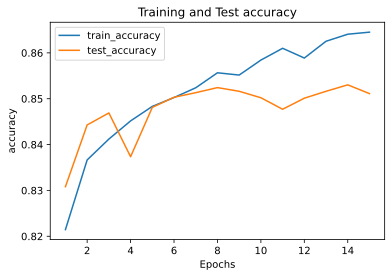

In [35]:
plot_metric(history, 'accuracy')

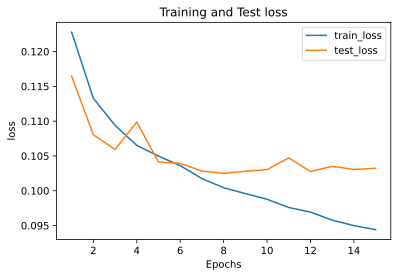

In [36]:
plot_metric(history, 'loss')

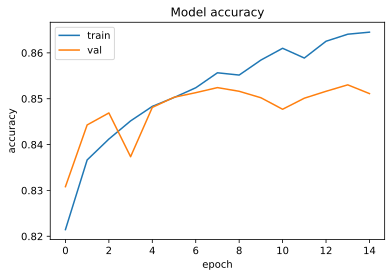

In [37]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(x_train, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:

import tensorflow as tf

# Below Training optimizations methods we have tried 
# Early Stopping
# Learning Rate Scheduler 
# L1 and L2 regularization


tf.random.set_seed(42)
#dense = tf.keras.layers.Dense(3, kernel_regularizer='l1_l2')
# These are the methods, just remove hash and run for optimization methods. 
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
#tf.keras.layers.Dense(1, kernel_regularizer='l1_l2'),

model = tf.keras.Sequential([
    tf.keras.layers.Dense(81, kernel_regularizer='l1_l2'),
    tf.keras.layers.Dense(128, activation='relu', input_shape = (81,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
def scheduler(epoch, lr):
        if epoch < 10:
              return lr
        else:
            return lr * tf.math.exp(-0.1)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 15, batch_size=10)
# Take higher epoch for better accuracy. 

Epoch 1/15
2021/2021 [==============================] - 14s 6ms/step - loss: 0.4817 - accuracy: 0.8110 - precision: 0.6666 - recall: 0.4930 - val_loss: 0.1697 - val_accuracy: 0.8102 - val_precision: 0.8015 - val_recall: 0.2997
Epoch 2/15
2021/2021 [==============================] - 17s 8ms/step - loss: 0.1507 - accuracy: 0.8184 - precision: 0.6743 - recall: 0.5338 - val_loss: 0.1339 - val_accuracy: 0.8350 - val_precision: 0.7032 - val_recall: 0.5654
Epoch 3/15
2021/2021 [==============================] - 13s 6ms/step - loss: 0.1381 - accuracy: 0.8260 - precision: 0.6876 - recall: 0.5611 - val_loss: 0.1290 - val_accuracy: 0.8371 - val_precision: 0.6834 - val_recall: 0.6240
Epoch 4/15
2021/2021 [==============================] - 14s 7ms/step - loss: 0.1333 - accuracy: 0.8303 - precision: 0.7002 - recall: 0.5654 - val_loss: 0.1264 - val_accuracy: 0.8424 - val_precision: 0.6961 - val_recall: 0.6330
Epoch 5/15
2021/2021 [==============================] - 11s 6ms/step - loss: 0.1316 - accura